## Importing dataset and visualization

In [72]:
import PRF
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../../'))
from utils import load_keel_dataset

file_path_train="../keel_data/yeast-5-1tra.dat"
file_path_test="../keel_data/yeast-5-1tst.dat"


X_train, X_test, y_train, y_test, label_map = load_keel_dataset(
    train_path=file_path_train,
    test_path=file_path_test,
    already_split=True
)
print("Head of training data: \n", X_train[:5])
print("Head of labels: \n", y_train[:5])

Head of training data: 
 [[0.58 0.61 0.47 0.13 0.5  0.   0.48 0.22]
 [0.43 0.67 0.48 0.27 0.5  0.   0.53 0.22]
 [0.42 0.44 0.48 0.54 0.5  0.   0.48 0.22]
 [0.51 0.4  0.56 0.17 0.5  0.5  0.49 0.22]
 [0.5  0.54 0.48 0.65 0.5  0.   0.53 0.22]]
Head of labels: 
 [7 7 7 1 7]


#### Visualization

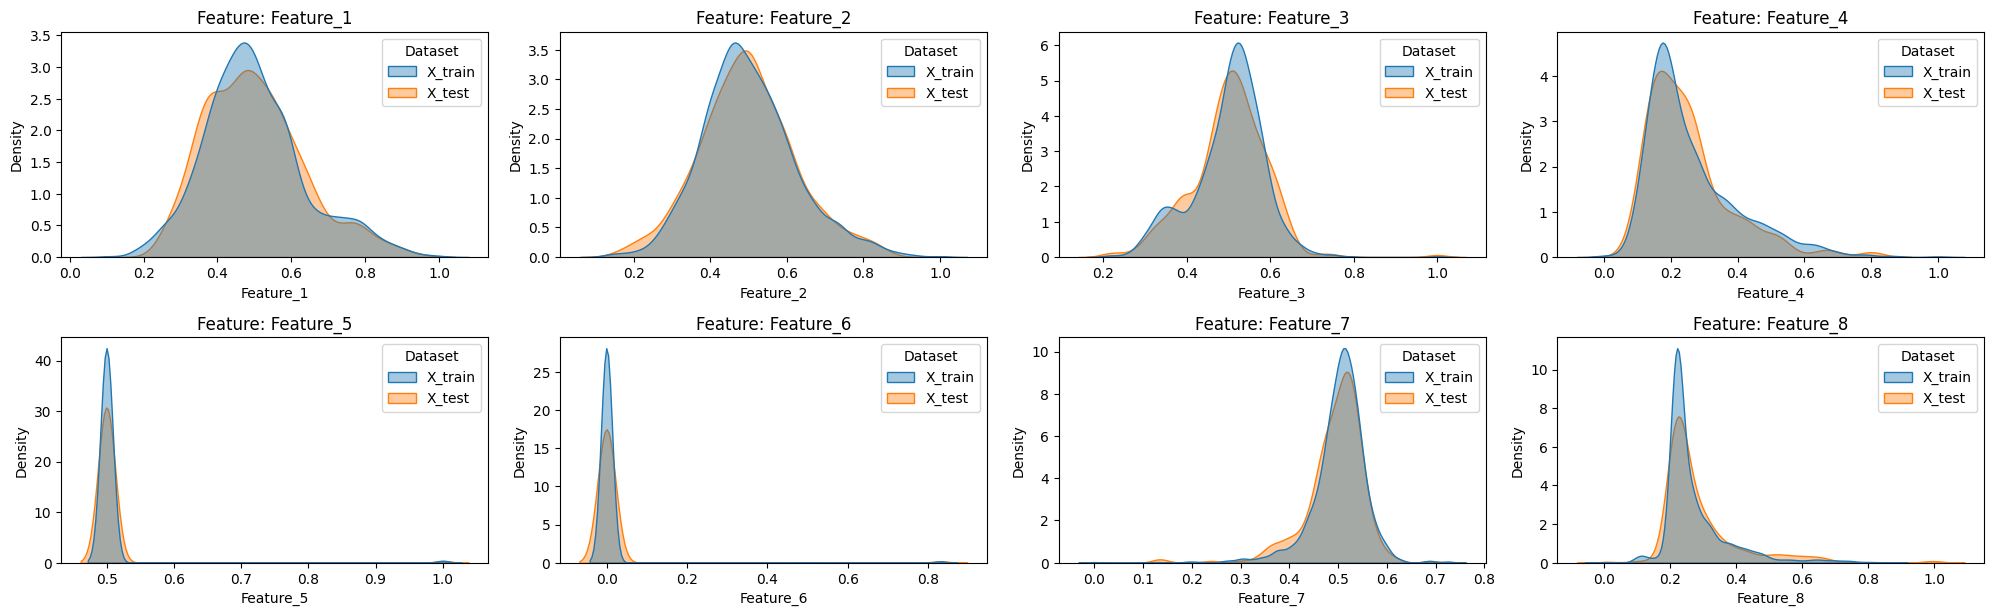

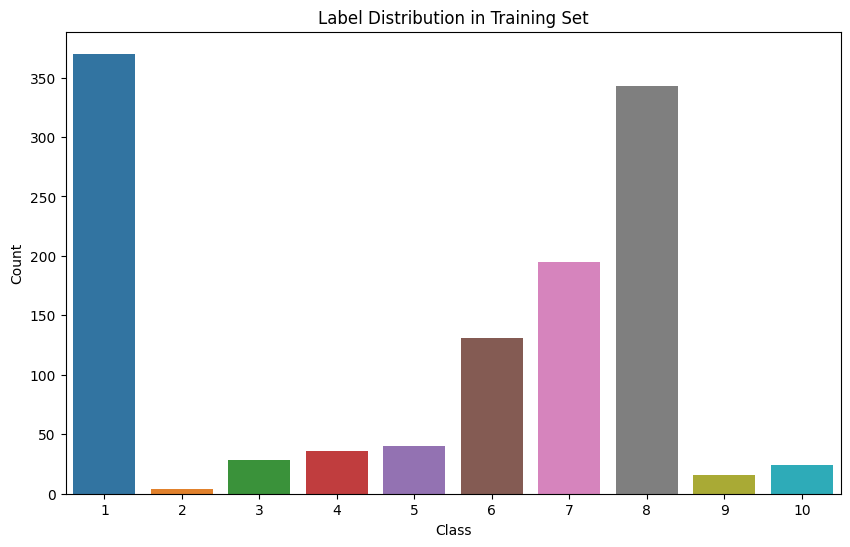

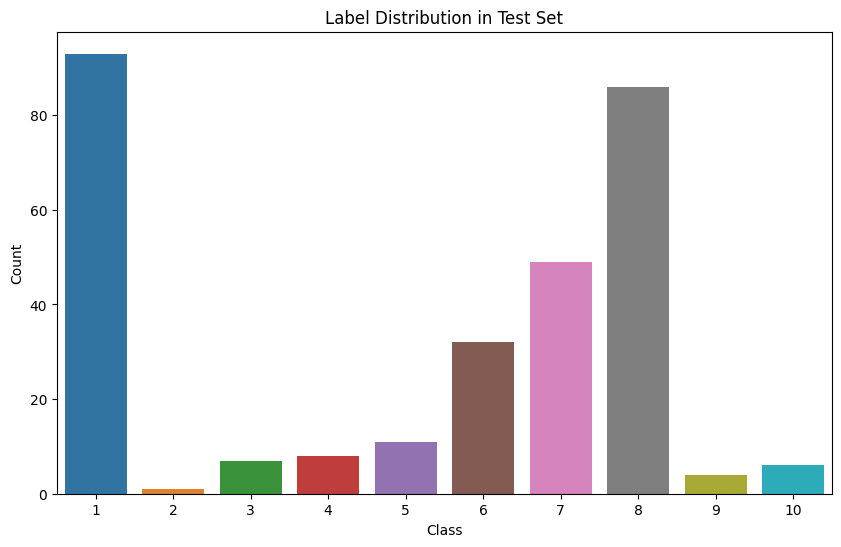

In [73]:
feature_names_train = [f'Feature_{i+1}' for i in range(X_train.shape[1])]

df1 = pd.DataFrame(X_train, columns=feature_names_train)
df1['Label'] = y_train
df1['Dataset'] = 'X_train'

feature_names_test = [f'Feature_{i+1}' for i in range(X_test.shape[1])]

df2 = pd.DataFrame(X_test, columns=feature_names_test)
df2['Label'] = y_test       # <-- Fix here: assign y_test to df2, not df1
df2['Dataset'] = 'X_test'

# Combine both train and test dataframes for plotting
df_all = pd.concat([df1, df2], ignore_index=True)

# Plot distributions of each feature side by side
plt.figure(figsize=(20, 15))
for i, feature in enumerate(feature_names_train):
    plt.subplot(5, 4, i + 1)
    sns.kdeplot(data=df_all, x=feature, hue='Dataset', common_norm=False, fill=True, alpha=0.4, bw_adjust=0.8)
    plt.title(f"Feature: {feature}")
plt.tight_layout()
plt.show()



# Plot label distribution (only for training set or combined if you want)
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df1, order=sorted(df1['Label'].unique()))
plt.title("Label Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df2, order=sorted(df2['Label'].unique()))
plt.title("Label Distribution in Test Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


#### Adding noise

In [75]:
# NOTE: THIS CODE MAKES LITTLE SENSE IF THERE ARE BOUNDS IN AN INTERVAL OF A FEATURE (LIKE IT HAS TO BE BETWEEN 0 AND 1)

from utils.noising import add_noise

X_train_noisy, _, dX, _ = add_noise(X_train, noise_type='gaussian_heteroschedastic', gaussian_scale=0.6)

# Printing noise head (dX):
print("Head of noise (dX): \n", dX[:5])


Head of noise (dX): 
 [[ 4.47391456e-01 -1.11100718e-01  1.74579708e-01  3.08881244e-02
   6.70218284e-02 -3.26036503e-08 -5.16316895e-02  3.20539661e-02]
 [ 2.11833082e-01  4.89256301e-01  1.61121550e-01  6.10325830e-02
  -1.68342090e-01 -6.04610192e-07  3.89927004e-01 -7.00205778e-02]
 [-6.94219024e-02 -7.68884183e-02 -6.83697856e-02 -1.65352756e-01
  -1.63756280e-01  2.75237271e-07  5.63300490e-02 -5.51306487e-02]
 [ 1.15125409e-01 -2.91210665e-01  1.41092376e-01 -2.67414010e-01
   2.16918965e-01 -2.68626883e-01 -5.01543870e-02  2.26926734e-01]
 [ 7.71561876e-01 -6.26552460e-02  2.34752755e-02  1.77967649e-01
  -2.52969154e-01  9.16051890e-07  1.40720121e-01  2.83834952e-02]]


In [ ]:
# TODO: Noise for labels (?), other types of noise

#### Visualizing noise

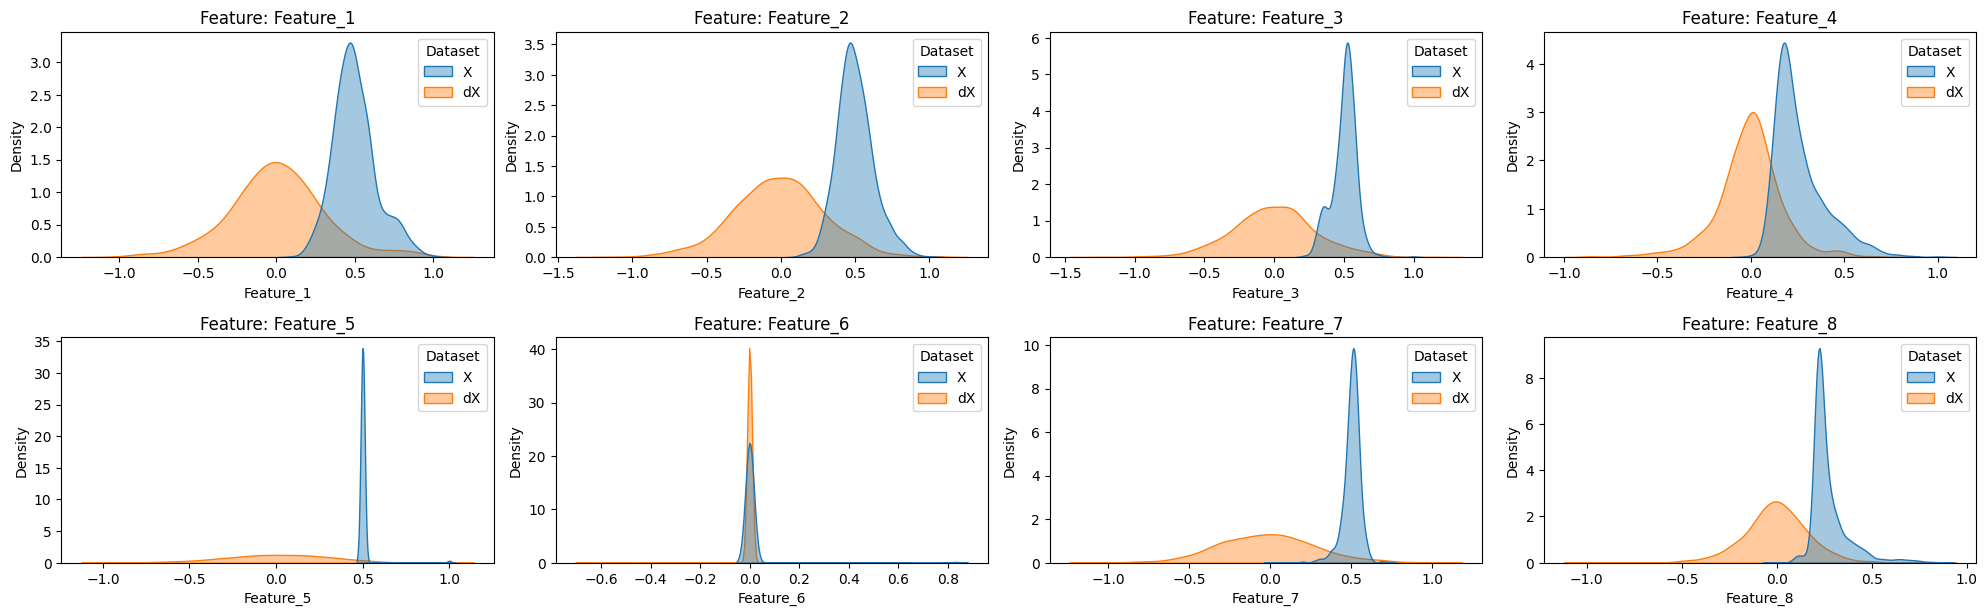

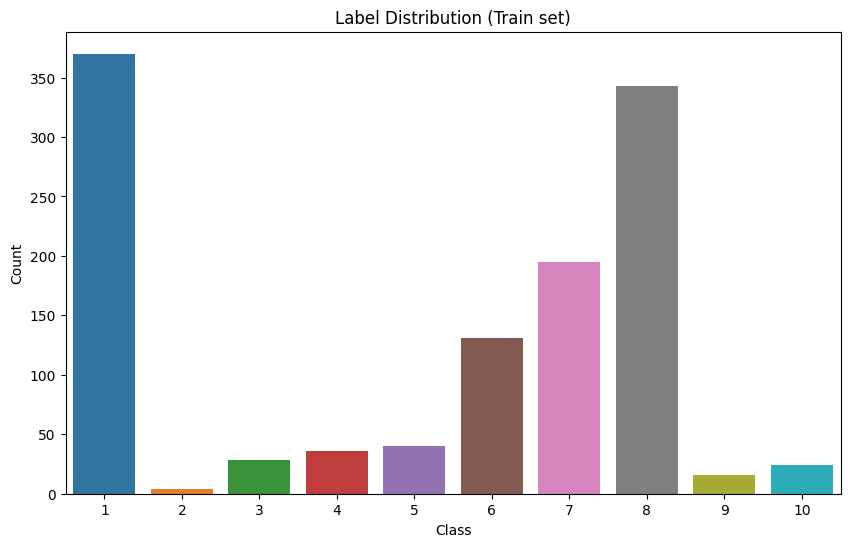

In [76]:
feature_names = [f'Feature_{i+1}' for i in range(X_train.shape[1])]

df1 = pd.DataFrame(X_train, columns=feature_names)
df1['Label'] = y_train
df1['Dataset'] = 'X'

df2 = pd.DataFrame(dX, columns=feature_names)
df2['Dataset'] = 'dX'

# Combine both for easier plotting
df_all = pd.concat([df1, df2], ignore_index=True)

# Plot distributions of each feature side by side
plt.figure(figsize=(20, 15))
for i, feature in enumerate(feature_names):
    plt.subplot(5, 4, i + 1)
    sns.kdeplot(data=df_all, x=feature, hue='Dataset', common_norm=False, fill=True, alpha=0.4)
    plt.title(f"Feature: {feature}")
plt.tight_layout()
plt.show()

# Plot label distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df1, order=sorted(df1['Label'].unique()))
plt.title("Label Distribution (Train set)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## PDRF

In [77]:
# TODO: Use the PDRF algorithm

accuracy_PDRF = 1.0 # Placeholder for the actual accuracy 

## Other methods for classification

#### Probabilistic Random Forest

In [78]:
n_trees = 10
prf_cls = PRF.prf(n_estimators=n_trees,  bootstrap=True)
prf_cls.fit(X=X_train_noisy, y=y_train, dX=dX)
score = prf_cls.score(X_test, y=y_test)
print('PRF Score: ', score)

#Score is defined like this, so same as accuracy

'''def score(self, X, y, dX=None):
        y_pred = self.predict(X, dX)
        score = (y_pred == (y)).sum()/len(y)
        return score''' 

accuracy_PRF = score

PRF Score:  0.41414141414141414


#### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=20, random_state=27)
# Fit the model
rf.fit(X_train_noisy, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

accuracy_RF = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_RF:.4f}")

Accuracy: 0.3098


#### Deep Forest

In [80]:
from deepforest import CascadeForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set random_state for reproducibility
clf = CascadeForestClassifier(n_estimators=2, random_state=27)  # 2 estimators per layer by default

# Fit the model
clf.fit(X_train_noisy, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
accuracy_DF = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_DF:.4f}")
print(classification_report(y_test, y_pred))

[2025-06-04 10:29:53.501] Start to fit the model:
[2025-06-04 10:29:53.502] Fitting cascade layer = 0 
[2025-06-04 10:29:54.609] layer = 0  | Val Acc = 33.614 % | Elapsed = 1.107 s
[2025-06-04 10:29:54.617] Fitting cascade layer = 1 
[2025-06-04 10:29:55.748] layer = 1  | Val Acc = 32.013 % | Elapsed = 1.131 s
[2025-06-04 10:29:55.749] Early stopping counter: 1 out of 2
[2025-06-04 10:29:55.755] Fitting cascade layer = 2 
[2025-06-04 10:29:56.824] layer = 2  | Val Acc = 33.530 % | Elapsed = 1.069 s
[2025-06-04 10:29:56.825] Early stopping counter: 2 out of 2
[2025-06-04 10:29:56.825] Handling early stopping
[2025-06-04 10:29:56.825] The optimal number of layers: 1
[2025-06-04 10:29:56.827] Start to evalute the model:
[2025-06-04 10:29:56.827] Evaluating cascade layer = 0 
Accuracy: 0.4108
              precision    recall  f1-score   support

           1       0.35      0.51      0.41        93
           2       0.00      0.00      0.00         1
           3       0.00      0.00    

/home/fabyk/PROJECT_PML/PML/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabyk/PROJECT_PML/PML/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabyk/PROJECT_PML/PML/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Neural Network

In [81]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import os

# Disable GPU (otherwise my PC explodes for some reason)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
np.random.seed(27)
tf.random.set_seed(27)

# Detect classification type
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
is_binary = num_classes == 2

# One-hot encode labels if multiclass
if not is_binary:
    y_train_cat = to_categorical(np.searchsorted(unique_classes, y_train))
    y_test_cat = to_categorical(np.searchsorted(unique_classes, y_test))
else:
    y_train_cat = y_train
    y_test_cat = y_test

# Define the model builder function
def create_model(hidden_units=32, dropout_rate=0.5, optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_units, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(dropout_rate))
    if is_binary:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    else:
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap with SciKeras
model = KerasClassifier(model=create_model, verbose=0)

# Grid search parameters
param_grid = {
    'model__hidden_units': [32, 64],
    'model__dropout_rate': [0.3, 0.5],
    'model__optimizer': ['adam'],
    'batch_size': [16],
    'epochs': [20]
}

# Grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=1)
grid_result = grid.fit(X_train_noisy, y_train_cat)

# Evaluate the best model
best_model = grid_result.best_estimator_

if is_binary:
    y_pred = best_model.predict(X_test)
    y_test_true = y_test
else:
    y_pred_proba = best_model.predict_proba(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_true = np.searchsorted(unique_classes, y_test)

# Output results
accuracy_NN = accuracy_score(y_test_true, y_pred)
print("Best params:", grid_result.best_params_)
print(f"Accuracy: {accuracy_NN:.4f}")
print(classification_report(y_test_true, y_pred, digits=4))


Best params: {'batch_size': 16, 'epochs': 20, 'model__dropout_rate': 0.3, 'model__hidden_units': 64, 'model__optimizer': 'adam'}
Accuracy: 0.3737
              precision    recall  f1-score   support

           0     0.2500    0.2366    0.2431        93
           1     0.0000    0.0000    0.0000         1
           2     0.0000    0.0000    0.0000         7
           3     0.0000    0.0000    0.0000         8
           4     0.0000    0.0000    0.0000        11
           5     0.0000    0.0000    0.0000        32
           6     0.6471    0.2245    0.3333        49
           7     0.4021    0.8837    0.5527        86
           8     0.6667    0.5000    0.5714         4
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.3737       297
   macro avg     0.1966    0.1845    0.1701       297
weighted avg     0.3105    0.3737    0.2989       297



/home/fabyk/PROJECT_PML/PML/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabyk/PROJECT_PML/PML/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabyk/PROJECT_PML/PML/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Bayesian Logistic Regression (??)

#### Kernel SVM

In [82]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# 1. Define the model
svm_model = SVC()

# 2. Define hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto']  
}

# 3. Grid search with cross-validation
grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(X_train_noisy, y_train)

# 4. Predict with best model
best_svm = grid_result.best_estimator_
y_pred = best_svm.predict(X_test)

# 5. Report
accuracy_KSVM = accuracy_score(y_test, y_pred)
print("Best params:", grid_result.best_params_)
print(f"Accuracy: {accuracy_KSVM:.4f}")
print(classification_report(y_test, y_pred))


Best params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.3872
              precision    recall  f1-score   support

           1       0.33      0.85      0.47        93
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        32
           7       0.62      0.10      0.18        49
           8       0.62      0.33      0.43        86
           9       0.75      0.75      0.75         4
          10       0.00      0.00      0.00         6

    accuracy                           0.39       297
   macro avg       0.23      0.20      0.18       297
weighted avg       0.40      0.39      0.31       297



/home/fabyk/PROJECT_PML/PML/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabyk/PROJECT_PML/PML/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabyk/PROJECT_PML/PML/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Results Comparison

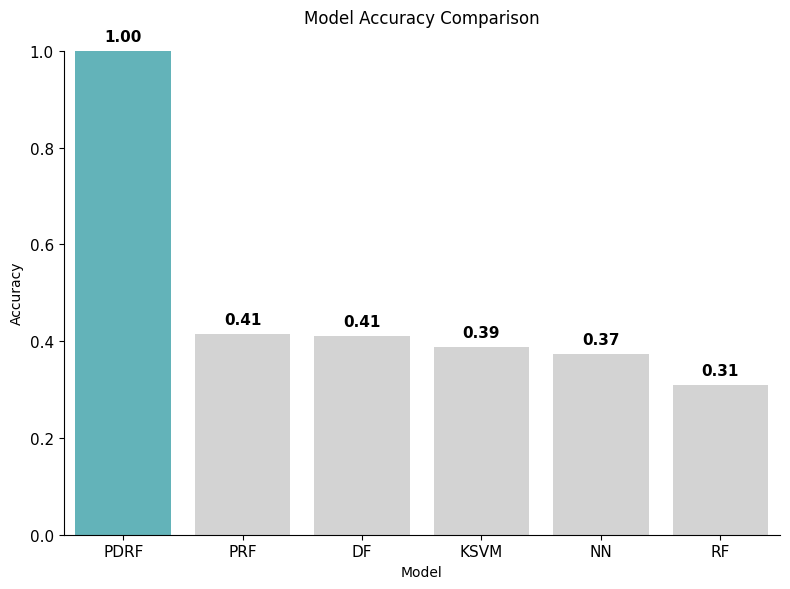

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data
data = {
    'Model': ['PRF', 'PDRF', 'NN', 'KSVM', 'DF','RF'],
    'Accuracy': [accuracy_PRF, accuracy_PDRF, accuracy_NN, accuracy_KSVM, accuracy_DF, accuracy_RF]
}

df = pd.DataFrame(data)

# Sort by Accuracy descending
df = df.sort_values('Accuracy', ascending=False)

# Define colors based on your request
def get_color(model):
    if model == 'PDRF':
        return '#55bfc7'
    elif model in ['PRF', 'DF']:
        return 'lightgray'
    else:
        return 'lightgray'

colors = df['Model'].apply(get_color)

plt.figure(figsize=(8,6))
ax = sns.barplot(x='Model', y='Accuracy', data=df, palette=colors)

# Remove top and right spines
sns.despine()

# Add space between title and plot
plt.title('Model Accuracy Comparison', pad=20)

# Set labels and limits
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')

# Set tick font size
ax.tick_params(axis='both', labelsize=11)

# Add accuracy values on top of each bar, bold
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='black',
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()



#### Saving results

In [ ]:
import os
from pathlib import Path

# 1. Extract filename base: last part after `/`, before `.`, remove "tra" if present
filename = Path(file_path_train).name  # 'my_dataset_tra.csv'
basename = filename.rsplit('.', 1)[0].replace('tra', '')  # 'my_dataset_'

# 2. Create output folder one level up
output_dir = Path(file_path_train).parent.parent / 'accuracy_scores'
output_dir.mkdir(parents=True, exist_ok=True)

# 3. Save the dataframe
output_path = output_dir / f'{basename}_noisy.csv'
df.to_csv(output_path, index=False)

print(f"Accuracy data saved to: {output_path}")


Accuracy data saved to: ../accuracy_scores/yeast-5-1_noisy.csv
